In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_bs_o = pd.read_excel('financial_source.xlsx',sheet_name='Business Segment(Region)')

In [2]:
df_bs_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     8 non-null      int64 
 1   Region   8 non-null      object
 2   Revenue  8 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [3]:
df_bs_o.head()

,Year,Region,Revenue
0,2020,National,404575
1,2020,International,113950
2,2021,National,685827
3,2021,International,36050
4,2022,National,649250


In [4]:
filter_year = 2022

filter_df = df_bs_o[df_bs_o['Year'] == filter_year].groupby('Region')['Revenue'].sum()
filter_df

Region
International      1857
National         649250
Name: Revenue, dtype: int64

In [5]:
# Calculate the total revenue
total_revenue = filter_df.sum()

# Add a 'percentage' column
filter_df = filter_df.reset_index()  # Reset index to add a new column
filter_df['percentage'] = (filter_df['Revenue'] / total_revenue) * 100

# Output the result
filter_df

,Region,Revenue,percentage
0,International,1857,0.285207
1,National,649250,99.714793


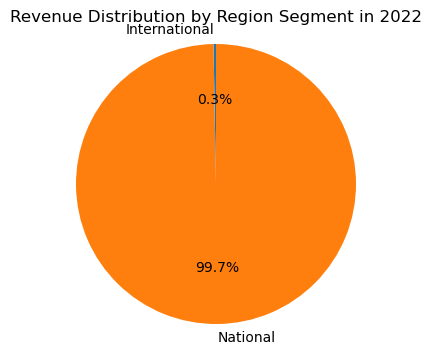

In [8]:
labels = filter_df['Region']
percentage = filter_df['percentage']

plt.figure(figsize=(5, 4))
plt.pie(percentage,labels=labels,autopct='%1.1f%%',startangle=90)
plt.title('Revenue Distribution by Region Segment in 2022')
plt.axis('equal')
plt.show()

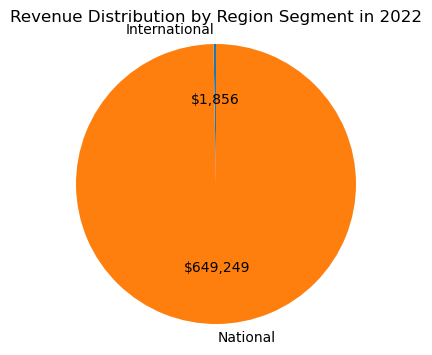

In [9]:
labels = filter_df['Region']
revenue = filter_df['Revenue']

def autopct_func(pct, allvalues):
    absolute = int(pct/100.*sum(allvalues))
    return f"${absolute:,.0f}"  # Format the revenue value with commas

plt.figure(figsize=(5, 4))
plt.pie(revenue,labels=labels,autopct=lambda pct: autopct_func(pct, revenue),startangle=90)
plt.title('Revenue Distribution by Region Segment in 2022')
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()

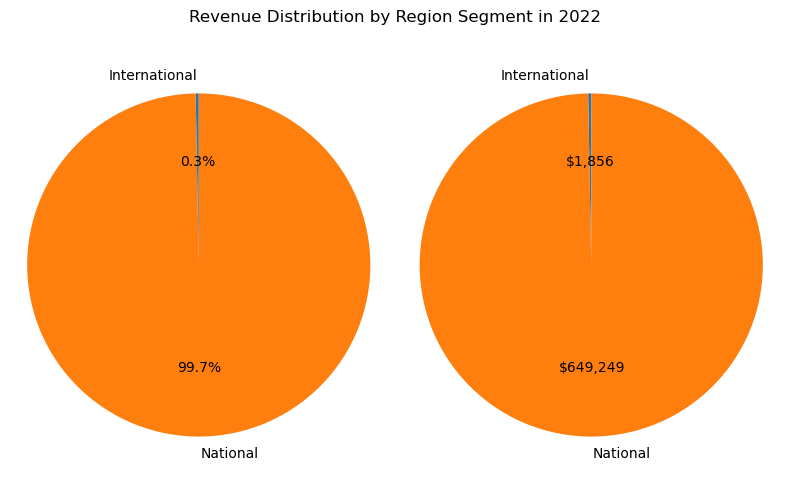

In [10]:
fig, ax = plt.subplots(1,2,figsize=(8, 5))

# plt.subplot(1,2,1)
# plt.pie(percentage,labels=labels,autopct='%1.1f%%',startangle=90)
# plt.axis('equal')

# plt.subplot(1,2,2)
# plt.pie(revenue,labels=labels,autopct=lambda pct: autopct_func(pct, revenue),startangle=90)
# plt.axis('equal')

ax[0].pie(percentage, labels=labels, autopct='%1.1f%%', startangle=90)
ax[0].axis('equal')  # Ensures the pie chart is circular

ax[1].pie(revenue, labels=labels, autopct=lambda pct: autopct_func(pct, revenue), startangle=90)
ax[1].axis('equal')  # Ensures the pie chart is circular

plt.suptitle('Revenue Distribution by Region Segment in 2022')
plt.tight_layout()
plt.show()

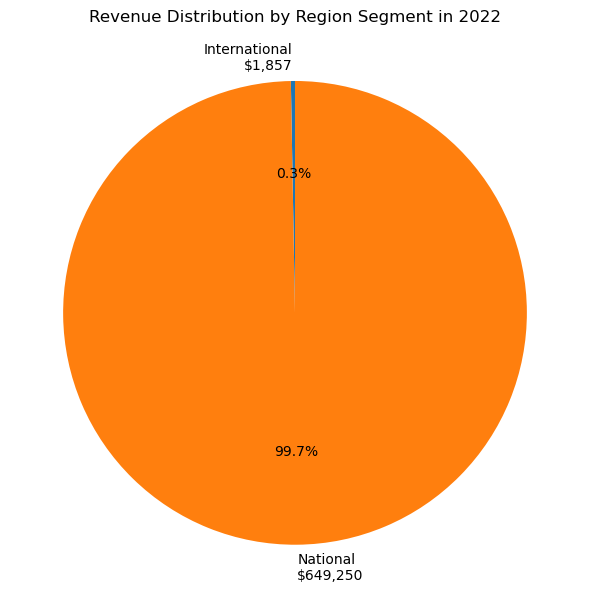

In [11]:
labels = [f"{segment}\n${revenue:,.0f}" for segment, revenue in zip(filter_df['Region'], filter_df['Revenue'])]

plt.figure(figsize=(6,6))
plt.pie(percentage,labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.suptitle('Revenue Distribution by Region Segment in 2022')
plt.tight_layout()
plt.show()